# Projectile Motion Assignment: Due 9/24

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

Code the equations into a function 

In [3]:
import scipy as sc
from scipy import integrate 
import numpy as np
import matplotlib.pyplot as plt
import math

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [18]:
xi = 0
yi = 0
vxi = 300*math.cos(math.radians(50))
vyi = 300*math.sin(math.radians(50))
m = (1/1000)*7.8*(4/3)*math.pi*(15/2)**3

def Projectile_vac(t,init,m):
    
    if (init[1] < 0):
        return np.array([0,0,0,0])
    return np.array([init[2],init[3],0,-9.81*m])
ti = 0
tf = 3.5
points = 1000
ni_air = integrate.solve_ivp(Projectile_vac,(ti,tf),np.array([xi,yi,vxi,vyi]), t_eval=np.linspace(ti,tf,points), args=(m,))

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

The horizontal range is 655.4777983889174 meters.


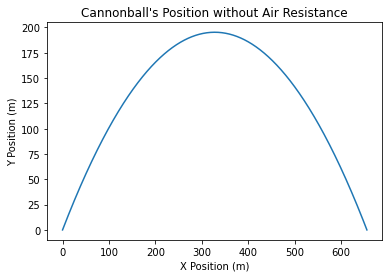

In [7]:
plt.plot(ni_air.y[0],ni_air.y[1])
plt.title('Cannonball\'s Position without Air Resistance')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
print("The horizontal range is {} meters.".format(ni_air.y[0][-1]))

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

They are the same, which is why they overlap exactly.


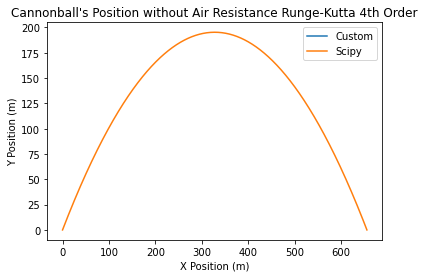

In [12]:
def runge_kutta_4(func, init, t, args=()):
    n = len(t)
    vals = np.zeros((n,len(init)))
    for i in range(0,n-1):
        dt = t[i+1]-t[i]
        k1 = func(t[i],vals[i],*args)
        k2 = func(t[i]+(dt/2),vals[i]+((dt/2)*k1),*args)
        k3 = func(t[i]+(dt/2),vals[i]+((dt/2)*k2),*args)
        k4 = func(t[i]+dt,vals[i]+(dt*k3),*args)
        vals[i+1] = vals[i] + ((dt/6)*(k1+(2*k2)+(2*k3)+k4))
    return vals
plt.figure()
custom = runge_kutta_4(Projectile_vac,np.array([xi,yi,vxi,vyi]),np.linspace(ti,tf,points),args=(m,))
plt.plot(custom[:,0],custom[:,1])
plt.plot(ni_air.y[0],ni_air.y[1])
plt.title('Cannonball\'s Position without Air Resistance Runge-Kutta 4th Order')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend(['Custom','Scipy'])
print('They are the same, which is why they overlap exactly.')

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [22]:
xi2 = 0
yi2 = 0
vxi2 = 300*math.cos(math.radians(50)) 
vyi2 = 300*math.sin(math.radians(50)) 
m2 = (1/1000)*7.8*(4/3)*math.pi*(15/2)**3 

def drag(v):
    return 0.005625*v**2
def projectile_vac(t,init,m):
    
    if (init[1] < 0):
        return np.array([0,0,0,0])
    return np.array([init[2],init[3],-drag(init[2]),(-9.81*m)-drag(init[3])])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [23]:
ti = 0
tf = 3.5
points = 1000
no_press = integrate.solve_ivp(projectile_vac,(ti,tf),np.array([xi2,yi2,vxi2,vyi2]), t_eval=np.linspace(ti,tf,points), args=(m2,))

Plot the ball's trajecory and find it's horizontal range

The horizontal range is 219.24567312812735 meters.


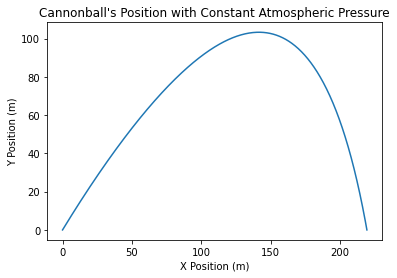

In [11]:
plt.figure()
plt.plot(no_press.y[0],no_press.y[1])
plt.title('Cannonball\'s Position with Constant Atmospheric Pressure')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
print("The horizontal range is {} meters.".format(no_press_var.y[0][-1]))

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [12]:
xi3 = 0 
yi3 = 0 
vxi3 = 300*math.cos(math.radians(50)) 
vyi3 = 300*math.sin(math.radians(50)) 
m3 = (1/1000)*7.8*(4/3)*math.pi*(15/2)**3 

def drag(y,v):
    return 0.005625*np.exp(-y/10000)*v**2
def projectile2_vac(t,init,m):
    
    if (init[1] < 0):
        return np.array([0,0,0,0])
    return np.array([init[2],init[3],-drag(init[1],init[2]),(-9.81*m)-drag(init[1],init[3])])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [14]:
ti = 0
tf = 3.5
points = 1000
truepath = integrate.solve_ivp(projectile2_vac,(ti,tf),np.array([xi3,yi3,vxi3,vyi3]), t_eval=np.linspace(ti,tf,points), args=(m3,))

Plot the ball's trajectory and find it's horizontal range

The horizontal range is 220.0021923394938 meters.


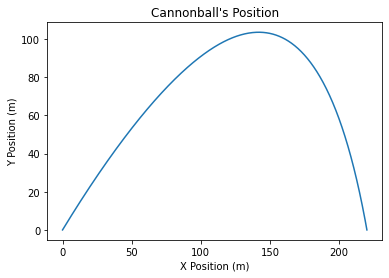

In [16]:
plt.figure()
plt.plot(truepath.y[0],truepath.y[1])
plt.title('Cannonball\'s Position')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
print("The horizontal range is {} meters.".format(truepath.y[0][-1]))

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

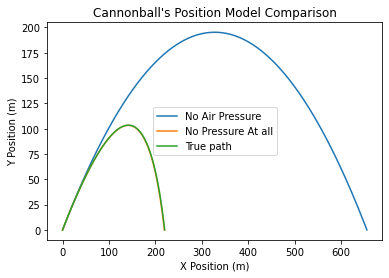

In [24]:
plt.figure()
plt.plot(ni_air.y[0],ni_air.y[1])
plt.plot(no_press.y[0],no_press.y[1])
plt.plot(truepath.y[0],truepath.y[1])
plt.title('Cannonball\'s Position Model Comparison')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend(['No Air Pressure', 'No Pressure At all', 'True path']);

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

In [ ]:
#adding air resistance had a much higher effect on the trajectory of the cannonball.